In [1]:
import sys
import numpy as np
sys.path.insert(1, '../../reinforcement_learning/code')
from env.bandit_env import BanditEnv
from agents.bandit_agent import Agent
from matplotlib import pyplot as plt

## Exercise 2.5

#### e-greedy

In [2]:
action_space = 10
state_space = 1
num_runs = 2000
max_steps = 1000
def run_greedy(action_space, state_space, epsilon, optimal_initial_value=0.):
    agent = Agent(action_space=action_space, state_space=state_space, epsilon=epsilon, e_greedy=True, optimal_initial_value=optimal_initial_value)
    env = BanditEnv(action_space)
    optimal_actions = np.zeros(max_steps)
    rewards = np.zeros(max_steps)
    for r in range(num_runs):
        env.reset()
        agent.reset()
        for t in range(max_steps):
            action = agent.act()
            reward = env.step(action)
            agent.step(reward=reward, action=action, sample_average=True)
            rewards[t]+=reward
            if action == env.best_action:
                optimal_actions[t]+=1
    return rewards/num_runs , optimal_actions/num_runs

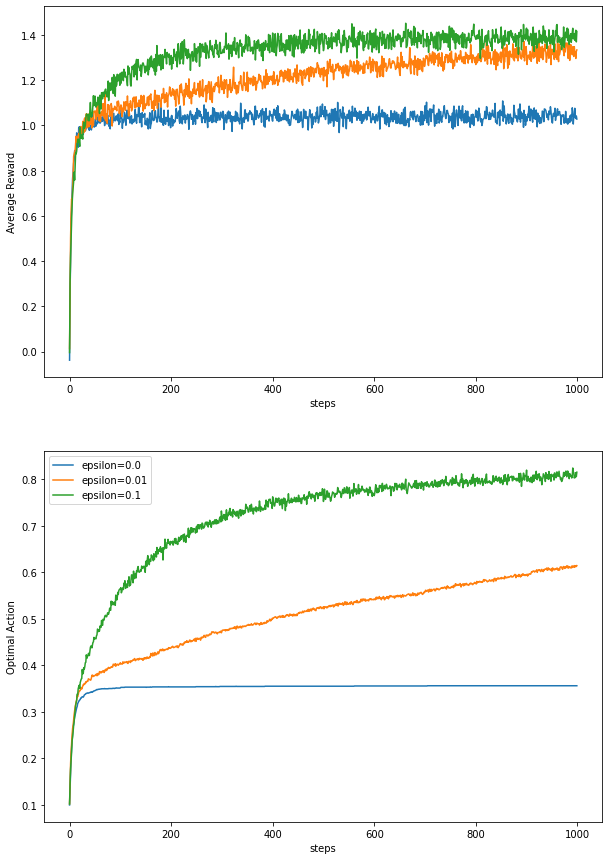

In [8]:

plt.figure(figsize=(10,15))
plt.subplot()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for i, epsilon in enumerate([0., 0.01, 0.1]):
    rewards, optimal_actions = run_greedy(action_space=action_space, state_space=state_space, epsilon=epsilon)
    ax1.plot(rewards, label=f'epsilon={epsilon}')
    ax2.plot(optimal_actions, label=f'epsilon={epsilon}')
ax1.set_xlabel('steps')
ax1.set_ylabel('Average Reward')
ax2.set_xlabel('steps')
ax2.set_ylabel('Optimal Action')
plt.legend()
plt.show()

#### 2.6 Optimal Initial Values

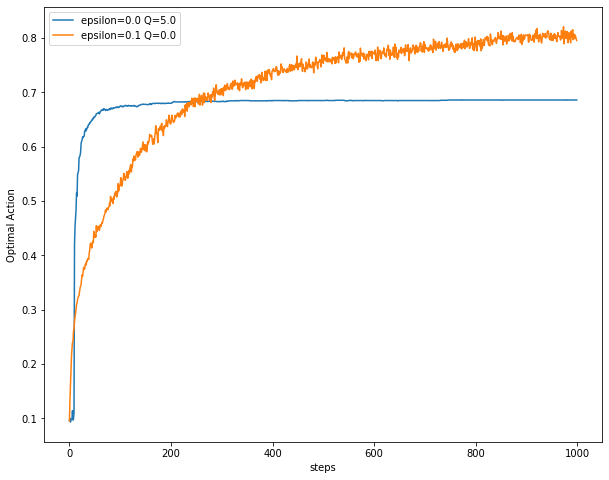

In [10]:
action_space = 10
state_space = 1
num_runs = 2000
max_steps = 1000

plt.figure(figsize=(10,8))
for epsilon, optimal_initial_value in [(0.,5.), (0.1,0.)]:
    rewards, optimal_actions = run_greedy(action_space=action_space, state_space=state_space, \
                                          epsilon=epsilon, optimal_initial_value=optimal_initial_value)
    plt.plot(optimal_actions, label=f'epsilon={epsilon} Q={optimal_initial_value}')
plt.xlabel('steps')
plt.ylabel('Optimal Action')
plt.legend()
plt.show()

#### 2.7 UCB

In [12]:
def run_ucb(action_space, state_space, epsilon):
    agent = Agent(action_space=action_space, state_space=state_space,\
                  step_size=0.1, ucb_const=2., ucb=True)
    env = BanditEnv(action_space)
    optimal_actions = np.zeros(max_steps)
    rewards = np.zeros(max_steps)
    for r in range(num_runs):
        env.reset()
        agent.reset()
        for t in range(max_steps):
            action = agent.act()
            reward = env.step(action)
            agent.step(reward=reward, action=action)
            rewards[t]+=reward
            if action == env.best_action:
                optimal_actions[t]+=1
    return rewards/num_runs , optimal_actions/num_runs

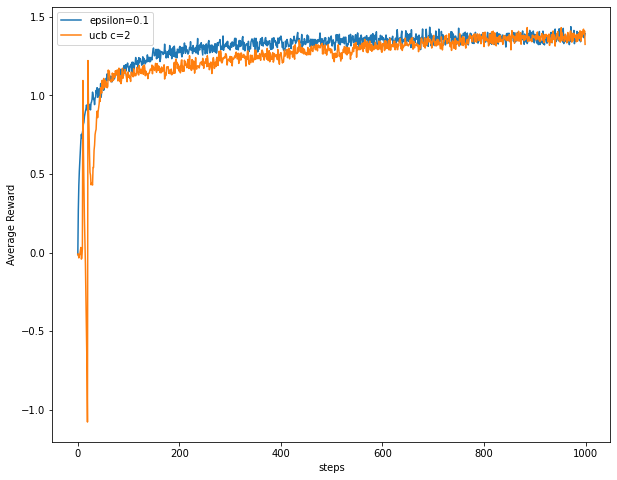

In [13]:
action_space = 10
state_space = 1
num_runs = 2000
max_steps = 1000

plt.figure(figsize=(10,8))
e_rewards, e_optimal_actions = run_greedy(action_space=action_space, state_space=state_space, epsilon=0.1)
plt.plot(e_rewards, label=f'epsilon={0.1}')
ucb_rewards, ucb_optimal_actions = run_ucb(action_space=action_space, state_space=state_space, epsilon=0.)
plt.plot(ucb_rewards, label=f'ucb c={2}')
plt.xlabel('steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

#### 2.8 Gradient

In [3]:
def run_gradient(action_space, state_space, use_baseline, step_size):
    agent = Agent(action_space=action_space, state_space=state_space,\
                  gradient=True, step_size=step_size)
    env = BanditEnv(action_space)
    optimal_actions = np.zeros(max_steps)
    rewards = np.zeros(max_steps)
    for r in range(num_runs):
        env.reset()
        agent.reset()
        for t in range(max_steps):
            action = agent.act()
            reward = env.step(action)
            agent.step(reward=reward, action=action, use_baseline=use_baseline)
            rewards[t]+=reward
            if action == env.best_action:
                optimal_actions[t]+=1
    return rewards/num_runs , optimal_actions/num_runs

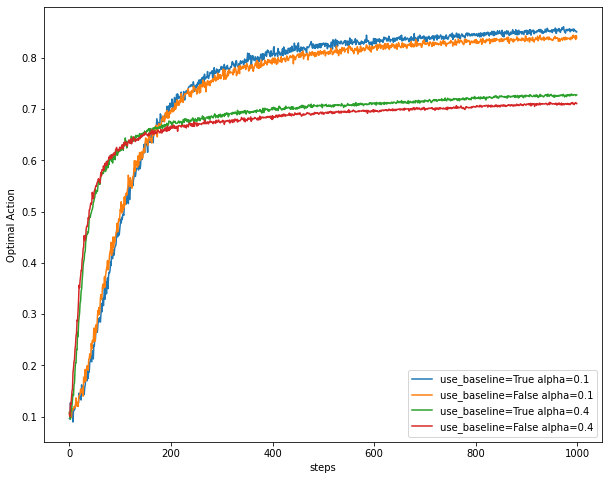

In [5]:
plt.figure(figsize=(10,8))
for use_baseline, step_size in [(True,0.1), (False,0.1), (True,0.4), (False,0.4)]:
    rewards, optimal_actions = run_gradient(action_space=action_space, state_space=state_space, \
                                            step_size=step_size, use_baseline=use_baseline)
    plt.plot(optimal_actions, label=f'use_baseline={use_baseline} alpha={step_size}')
plt.xlabel('steps')
plt.ylabel('Optimal Action')
plt.legend()
plt.show()